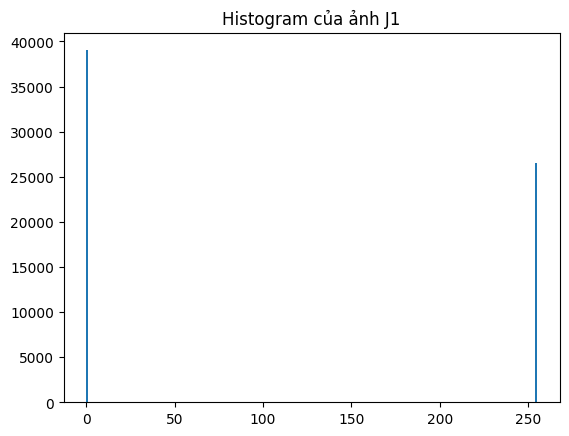

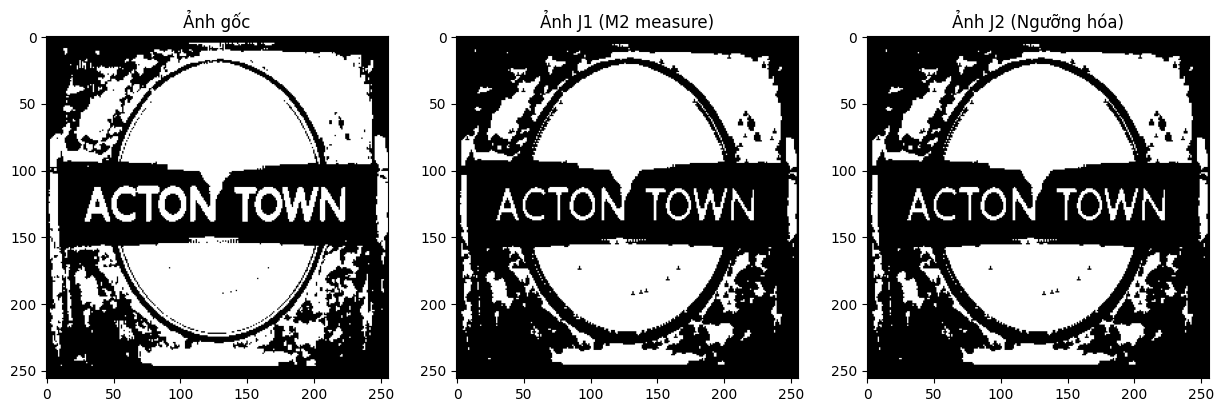

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Bước 1: Đọc ảnh nhị phân
# ---------------------------
def read_binary_image(filename, width=256, height=256):
    with open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), dtype=np.uint8)
    return data.reshape((height, width))

input_image = read_binary_image("actontBin.bin")

# ---------------------------
# Bước 2: Thiết kế template "T" chính xác (5x5)
# ---------------------------
# Template mô phỏng chữ "T" với thanh ngang trên và thanh dọc giữa
template = np.array([
    [1, 1, 1],
    [0, 1, 0],
    [0, 1, 0]
], dtype=np.uint8) * 255

t_height, t_width = template.shape

# ---------------------------
# Bước 3: Tính toán M2 với điều kiện chặt chẽ
# ---------------------------
J1 = np.zeros_like(input_image, dtype=np.float32)
total_ones = np.sum(template == 255)

# Duyệt qua từng pixel (trừ biên)
for i in range(1, input_image.shape[0] - 1):
    for j in range(1, input_image.shape[1] - 1):
        window = input_image[i-1:i+2, j-1:j+2]
        # Điều kiện 1: Thanh ngang trên khớp
        top_match = np.all(window[0, :] == 255)
        # Điều kiện 2: Thanh dọc giữa khớp
        middle_match = (window[1, 1] == 255) and (window[2, 1] == 255)
        if top_match and middle_match:
            M2 = 1.0  # Khớp hoàn toàn
        else:
            M2 = 0.0
        J1[i, j] = M2 * 255

J1 = J1.astype(np.uint8)

# ---------------------------
# Bước 4: Phân tích histogram để chọn ngưỡng
# ---------------------------
plt.hist(J1.ravel(), bins=256, range=(0, 255))
plt.title("Histogram của ảnh J1")
plt.show()

# Chọn ngưỡng dựa trên phân tích histogram (ví dụ: peak cao nhất)
threshold = 230  # Điều chỉnh dựa trên histogram
J2 = np.where(J1 >= threshold, 255, 0).astype(np.uint8)

# ---------------------------
# Bước 5: Hiển thị kết quả
# ---------------------------
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.title("Ảnh gốc")
plt.imshow(input_image, cmap='gray')

plt.subplot(132)
plt.title("Ảnh J1 (M2 measure)")
plt.imshow(J1, cmap='gray')

plt.subplot(133)
plt.title("Ảnh J2 (Ngưỡng hóa)")
plt.imshow(J2, cmap='gray')

plt.show()